In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#import sklearn.preprocessing


In [6]:
house = pd.read_csv('./data/clean_house.csv',index_col=0)

In [7]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,grade_value,yr_since_renovate
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,7,60.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,7,24.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2,6,82.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,7,50.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,8,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,5,8,6.0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2,8,1.0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,6,7,6.0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0.0,...,2004,0.0,98027,47.5345,-122.069,1410,1287,1,8,11.0


In [8]:
#Get correlation table of all numeric values of the housing data
corr_mat = house.corr(method='pearson')

#Get top right part of correlation table
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(bool))

#Drop the non top right part and unstack the data
unique_corr = upper_corr_mat.unstack().dropna()

#Sort the values and get absolute values to account for negative correlation
sort_corr = unique_corr.abs().sort_values(ascending=False)

#Convert to data frame
new_corr = sort_corr.to_frame().reset_index()

#Make correlation data frame with just correlations that contain price
price_corr = new_corr[(new_corr.level_0 == 'price') | (new_corr.level_1 == 'price')]

#Rename columns
price_corr.columns = ['feature1','feature2','corr']

In [20]:
top_15 = price_corr[0:15]
top_15 = house[['price']+list(top_15.feature1)]

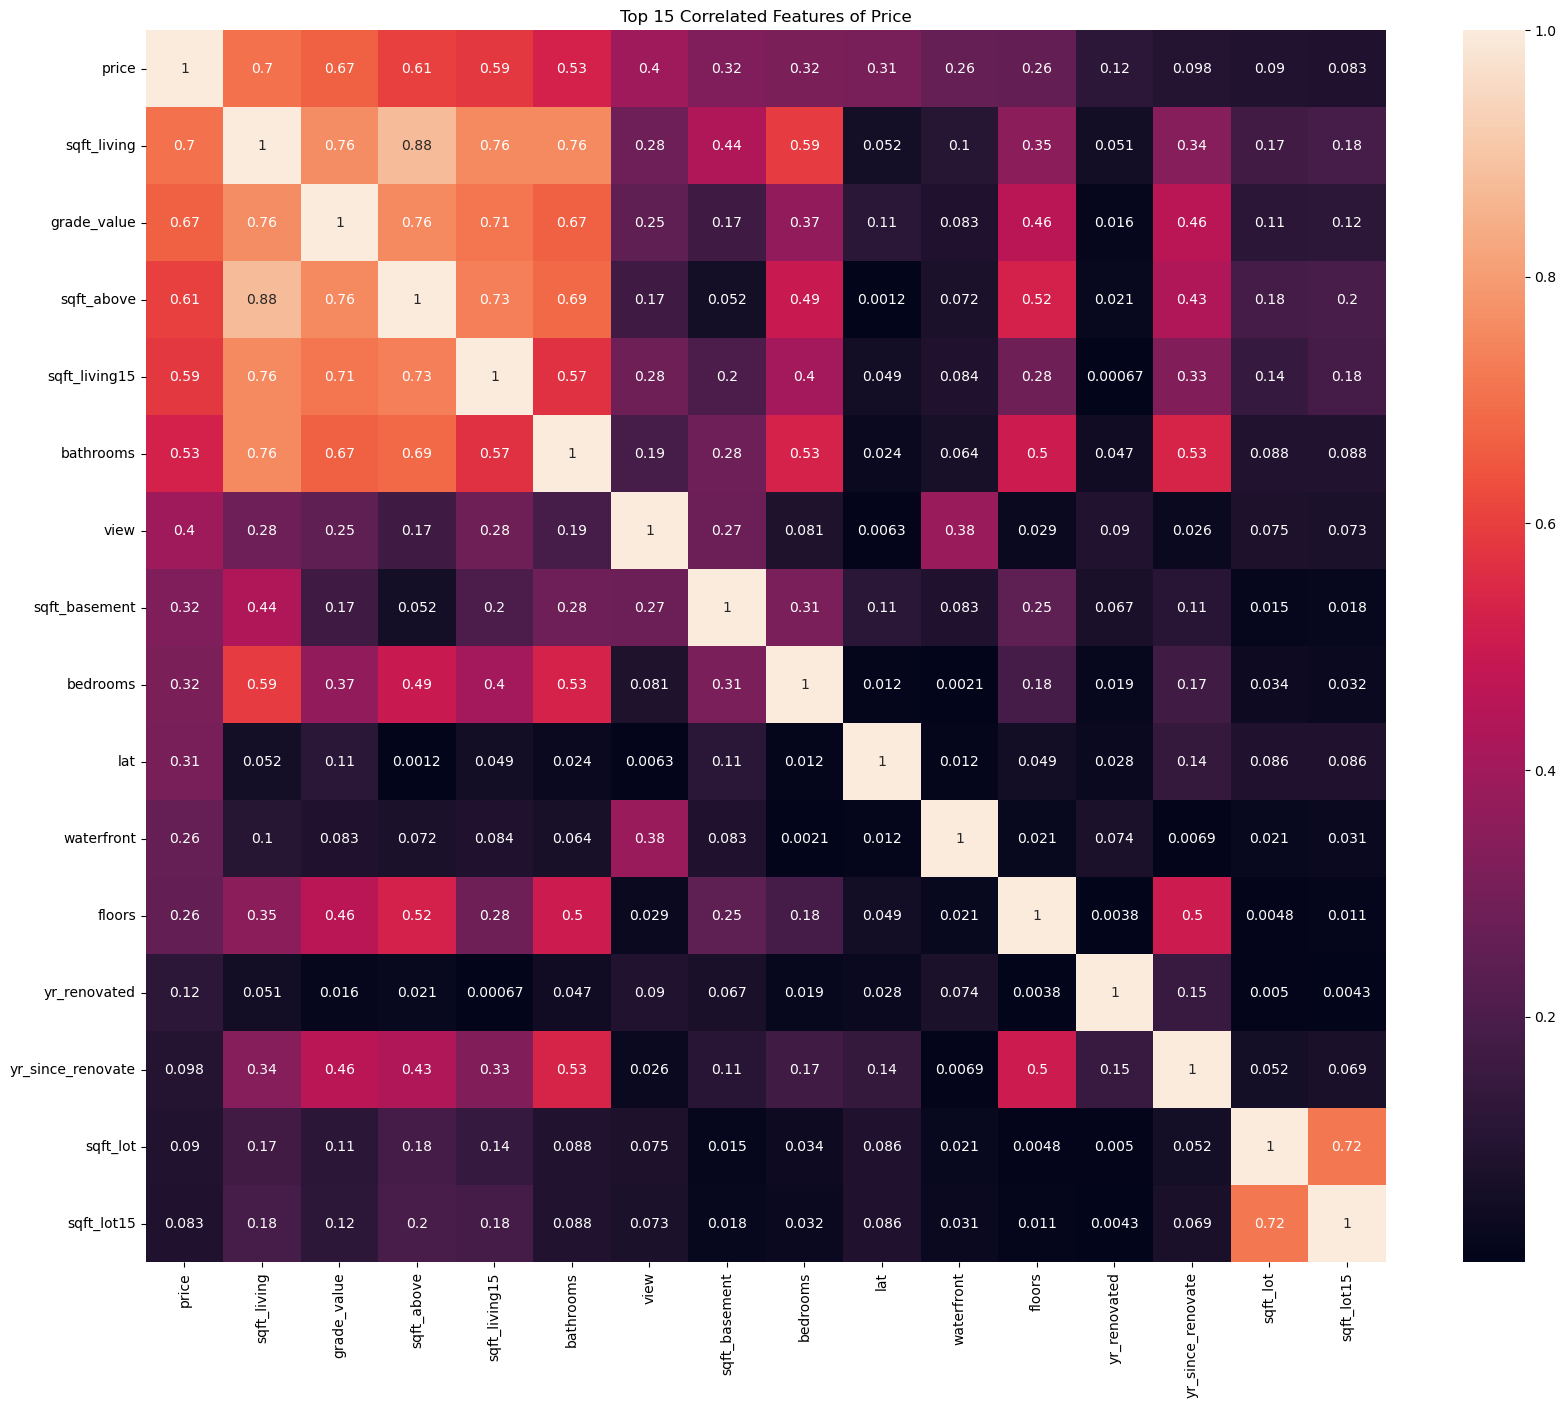

In [22]:
plt.figure(figsize=(20,16))
plt.title("Top 15 Correlated Features of Price")
sns.heatmap(top_15.corr().abs(),annot=True);

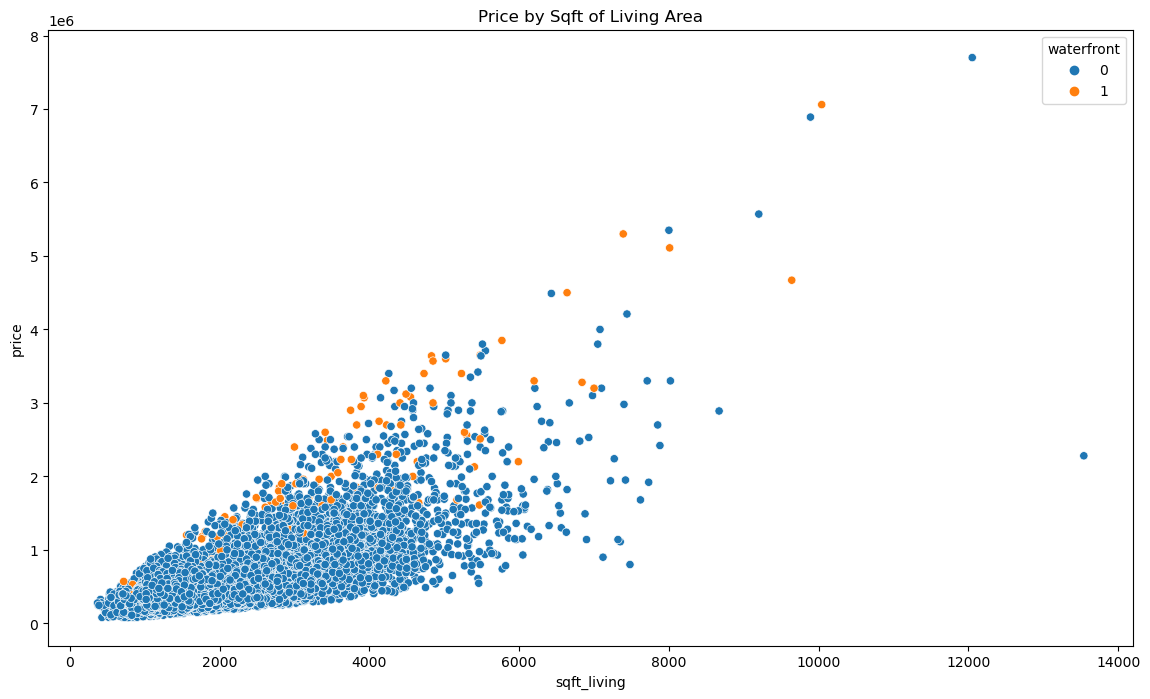

In [45]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=house.sqft_living,y=house.price,hue=house.waterfront)
plt.title("Price by Sqft of Living Area");

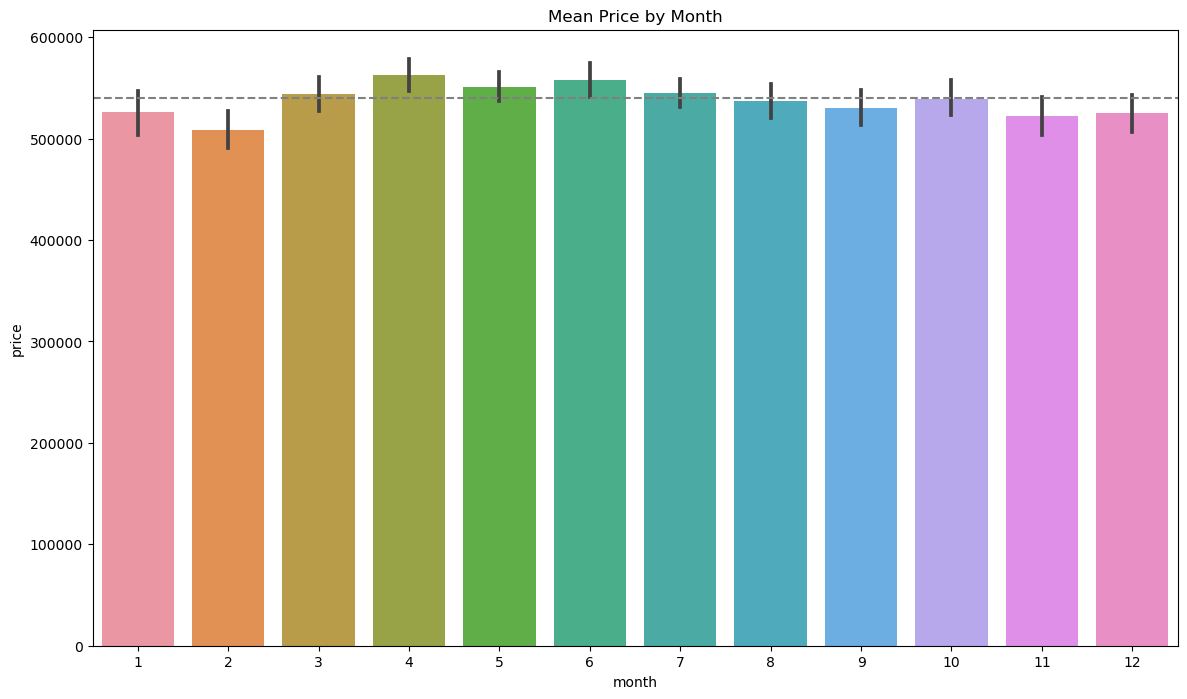

In [47]:
plt.figure(figsize=(14,8))
sns.barplot(x=house.month,y=house.price)
plt.axhline(house.price.mean(),linestyle ='--',color='gray')
plt.title('Mean Price by Month');

<AxesSubplot:xlabel='yr_since_renovate', ylabel='price'>

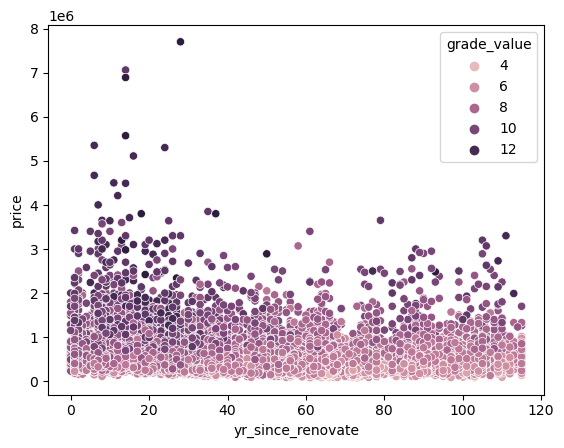

In [41]:
sns.scatterplot(x=house.yr_since_renovate, y=house.price,hue=house["grade_value"])